### Libraries and functions

In [1]:
from __future__ import print_function
%matplotlib inline


import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
from scipy.stats import binned_statistic
from ipywidgets import widgets
from IPython.display import display
import time

# LSST libraries, MAF metrics

import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.db as db
from lsst.sims.featureScheduler import utils as schedUtils
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.batches as batches

# Py file with functions
from functions import *

### Chose init data 
### Constants

In [2]:
# mjd_array = []
# opsim = []

In [22]:

# HTML for filters
# This part of the code is for choosing only
def select_data_filters(data):
    # scFilter.options = filters[data]
#     print(data)
    ;
    
filters={'g':'g','r':'r', 'u':'u', 'z':'z'}
scFilter = widgets.Select(options=filters.keys())
init = scFilter.value
i = widgets.interactive(select_data_filters, data=scFilter)
print('Choose filter: ');
display(i)

# Choose OpSim Realisation
opsims = {
    'FBS 1.5: AGN DDF' : 'agnddf_v1.5_10yrs.db',
    'FBS 1.5: BULGES CADENCE BS' : 'bulges_cadence_bs_v1.5_10yrs.db',
    'FBS 1.5: BASELINE' : 'baseline_v1.5_10yrs.db',
    'FBS 1.5: ROLLING MOD 6' : 'rolling_mod6_sdf_0.20_v1.5_10yrs.db',
    'FBS 1.6: BASELINE nexp1' : 'baseline_nexp1_v1.6_10yrs.db',
    
}
scOpSims = widgets.Select(options=opsims.keys())
init2 = scOpSims.value

def select_data_opsims(data):
#     print(data)
    # scOpSims.options = opsims[data]
    ;

j = widgets.interactive(select_data_opsims, data=scOpSims)
print('Choose opsims: ');
display(j)



# Choose RA
print('Choose RA:')
scRa = widgets.Text(placeholder="Right accension");
display(scRa);

# Choose DEC
print('Choose DEC:')
scDec = widgets.Text(placeholder="Declination");
display(scDec);

#Choose noise
print ('Choose Noise:');
def select_data_noise(data):
    # cityW.options = noises[data]
#     print(data);
    ;
noises={'1%':'0.01','2%':'0.02', '5%':'0.05', '10%':'0.1'}
scNoises = widgets.Select(options=noises.keys())
init3 = scNoises.value
k = widgets.interactive(select_data_noise, data=scNoises)
display(k)

np.random.seed(0)
sigma=0.18/np.sqrt(2) # standard deviation for DRW
tau=500. # time lag
long=10*365 # survey duration in days
deltatc=1. # cadence for LC_conti



#Choose amplitude
print('Choose amplitude:')
scAmp = widgets.Text(placeholder="Amplitude", value="0.2");
display(scAmp);



Choose filter: 


interactive(children=(Select(description='data', options=('g', 'r', 'u', 'z'), value='g'), Output()), _dom_cla…

Choose opsims: 


interactive(children=(Select(description='data', options=('FBS 1.5: AGN DDF', 'FBS 1.5: BULGES CADENCE BS', 'F…

Choose RA:


Text(value='', placeholder='Right accension')

Choose DEC:


Text(value='', placeholder='Declination')

Choose Noise:


interactive(children=(Select(description='data', options=('1%', '2%', '5%', '10%'), value='1%'), Output()), _d…

Choose amplitude:


Text(value='0.2', placeholder='Amplitude')

### Read Params

In [21]:
fil = scFilter.value;
opsim = opsims[scOpSims.value];

if not scRa.value or len(scRa.value) == 0 :
    ra = 0;
else:
    ra = int(scRa.value)

if not scDec.value or len(scDec.value) == 0 :
    dec = np.radians(-30);
else:
    ra = np.radians(int(scDec.value));

    
noise = float(noises[scNoises.value]);
amp = float(scAmp.value);

# get opsim path
if ( scOpSims.value.find('1.5') >= 0):
    dbfile = '/home/idies/workspace/lsst_cadence/FBS_1.5/' + opsim;
else:
    dbfile = '/home/idies/workspace/lsst_cadence/FBS_1.6/' + opsim;
print(dbfile)
outDir = '../tmp/'
opsdb = db.OpsimDatabase(dbfile)



/home/idies/workspace/lsst_cadence/FBS_1.5/agnddf_v1.5_10yrs.db


### Get cadences

Querying database SummaryAllProps with constraint filter = 'g' for columns ['fieldRA', 'fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec']
Found 214351 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


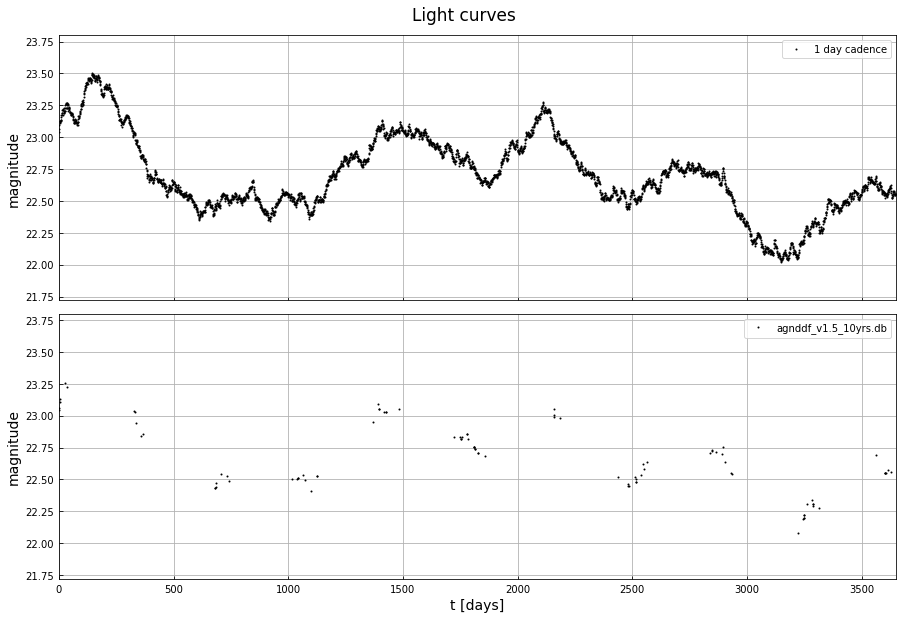

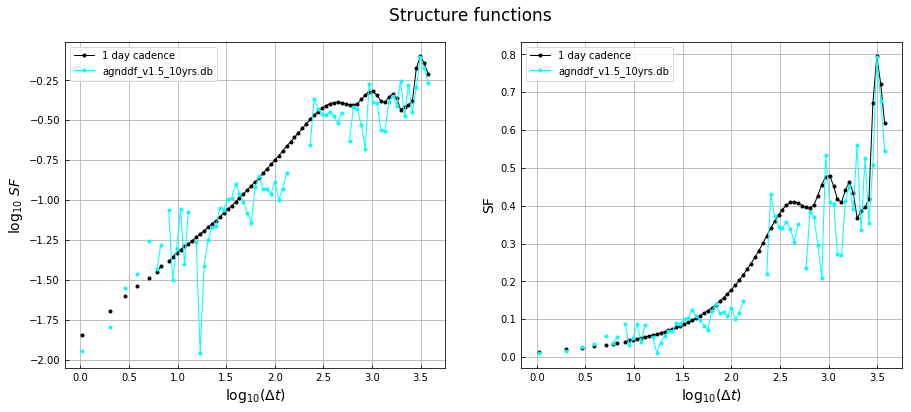

In [8]:
# Start everything

mjd =  getOpSimCadence(opsdb, opsim, ra, dec, fil);
LC_SF_viz(long, deltatc, [mjd], [opsim]);